## Three Stock Monte

This exercise tests your ability to retrieve stock price data using the Alpaca API and simulate multiple portfolio compositions using Monte Carlo Simulation.

Instructions:

1. Review the libraries and dependencies that have been imported into the `three_stock_monte.ipynb` notebook. Note that the MCSimulation tools have been imported into the notebook via the MCForecastTools library. The `Unsolved` folder includes the MCForecastTools library as a Python file .

2. Create an environment file (`.env`) in the `Unsolved` folder. Include variables for `ALPACA_API_KEY` and `ALPACA_SECRET_KEY` in this file for accessing the Alpaca API.

3. Load the environment variables into `three_stock_monte.ipynb`, and then import the Alpaca API and secret keys.

4. Set up the Alpaca API `REST` object. Make sure that this object includes your Alpaca API key, your Alpaca secret key, and a reference to the version that you’re using.

5. Use the Alpaca SDK to make an Alpaca API call that gets three years of daily historical price data for the following three stocks:

    - `NKE` (Nike)

    - `T` (AT&T)

    - `XOM` (Exxon Mobil)

6. Create an instance of MCSimulation with the following parameters that simulates the next five years of portfolio returns:

    - `weights`: Set this parameter to `[.33,.33,.33]` to evenly invest across all three stocks.

    - `num_simulation`: Set this parameter to `1000` to ensure the reliability of your simulation. If your computer struggles to run 1000 simulations, change the parameter value to 500.

    - `num_trading_days`: Set this parameter to `252*5` to simulate five years of trading days.

7. Run the Monte Carlo simulation. Using MCSimulation functions, visualize the simulation results by using both an overlay line plot and a histogram. Generate the summary statistics for the simulation, too.

8. Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

9. Create a second instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.20,.60,.20]` to represent a portfolio with a majority of AT&T stock.

10. Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

    - Visualize the simulation results by using both an overlay line plot and a histogram.

    - Generate the summary statistics for this new simulation.

    - Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

11. Create a third instance of MCSimulation with the same parameters, but set the `weights` variable to `[.60,.20,.20]` to represent a portfolio with a majority of Nike stock.

12. Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

    - Visualize the simulation results by using both an overlay line plot and a histogram.

    - Generate the summary statistics for this new simulation.

    - Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

13. Create a fourth instance of MCSimulation with the same parameters, but set the `weights` variable to `[.20,.20,.60]` to represent a portfolio with a majority of Exxon stock.

14. Run the Monte Carlo simulation with the new weights. Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

15. Review all four simulated portfolios, and determine which set of investments gives you the best chance of a profit. In your notebook, write which portfolio you choose, and why.

References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)


## Step 1: Review the libraries and dependencies that have been imported into the `three_stock_monte.ipynb` notebook. Note that the MCSimulation tools have been imported into the notebook via the MCForecastTools library. The `Unsolved` folder includes the MCForecastTools library as a Python file .

In [2]:
# Import libraries and dependencies
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

## Step 2: Create an environment file (`.env`) in the `Unsolved` folder. Include variables for `ALPACA_API_KEY` and `ALPACA_SECRET_KEY` in this file for accessing the Alpaca API

## Step 3: Load the environment variables into `three_stock_monte.ipynb`, and then import the Alpaca API and secret keys.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 

In [3]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

## Step 4: Set up the Alpaca API `REST` object. Make sure that this object includes your Alpaca API key, your Alpaca secret key, and a reference to the version that you’re using.

In [5]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

## Step 5:  Use the Alpaca SDK to make an Alpaca API call that gets three years of daily historical price data for the following three stocks: NKE, T, and XOM.

* Create the list for the required `tickers`.
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2017-05-01 through 2020-05-01.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_bars` function. 


In [6]:
# Create the list for the required tickers
tickers = ['NKE', 'T', 'XOM']

In [7]:
# Set the values for start_date and end_date using the pd.Timestamp function
# Inside the function set the date parameter to the prior business day 
# The start and end data should be 2017-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp('2020-12-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-12-11', tz='America/New_York').isoformat()

In [8]:
# Set timeframe to one day (1Day)
timeframe = '1Day'

In [9]:
# Use the Alpaca get_bars function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
NKE = prices_df[prices_df['symbol']=='NKE'].drop('symbol', axis=1)
T = prices_df[prices_df['symbol']=='T'].drop('symbol', axis=1)
XOM = prices_df[prices_df['symbol']=='XOM'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([NKE, T, XOM], axis=1, keys=["NKE", "T", "XOM"])

# Review the first five rows of the resulting DataFrame 
display(prices_df.head())
display(prices_df.tail())

NKE                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2020-12-11 05:00:00+00:00  137.41  138.14  136.2300       48095  137.39   
2020-12-14 05:00:00+00:00  136.28  139.00  136.2000       71983  138.92   
2020-12-15 05:00:00+00:00  139.39  139.44  137.2491       63392  137.43   
2020-12-16 05:00:00+00:00  138.34  140.49  137.4600       66526  139.07   
2020-12-17 05:00:00+00:00  140.50  140.74  138.7500       71041  139.92   

                                                     T                ...  \
                             volume        vwap  close   high    low  ...   
timestamp                                                             ...   
2020-12-11 05:00:00+00:00   4791625  137.205640  31.01  31.09  30.39  ...   
2020-12-14 05:00:00+00:00   9094010  137.110215  30.55  31.27  30.40  ...   
2020-12-15 05:00:00+00:00   8654601  138.637956  30.58  30.70  30.28  ...   
2020-12-16 05:00:00+00:00   7760287  138.360640  30.29  30.59  30.24  ...   
2020-12-17 05:00:00+00:00  10082003  140.203319  29.62  30.12  29.54  ...   

                                                         XOM                 \
                            open    volume       vwap  close    high    low   
timestamp                                                                     
2020-12-11 05:00:00+00:00  30.43  34229927  30.871040  43.80  43.925  43.21   
2020-12-14 05:00:00+00:00  31.23  48195789  30.732606  42.22  44.460  42.18   
2020-12-15 05:00:00+00:00  30.64  37647213  30.545353  43.04  43.220  42.06   
2020-12-16 05:00:00+00:00  30.53  38586707  30.345518  43.70  44.110  42.96   
2020-12-17 05:00:00+00:00  30.04  66528379  29.699122  43.48  44.040  43.40   

                                                                   
                          trade_count   open    volume       vwap  
timestamp                                                          
2020-12-11 05:00:00+00:00      138495  43.70  28221793  43.645405  
2020-12-14 05:00:00+00:00      156228  44.34  33923655  42.793300  
2020-12-15 05:00:00+00:00      144429  42.44  30474285  42.802554  
2020-12-16 05:00:00+00:00      168207  43.75  38379695  43.675632  
2020-12-17 05:00:00+00:00      123427  44.00  23380602  43.636206  

[5 rows x 21 columns]

NKE                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2023-12-05 05:00:00+00:00  115.41  116.04  114.6000       88366  114.66   
2023-12-06 05:00:00+00:00  116.11  117.14  115.5721       81078  116.00   
2023-12-07 05:00:00+00:00  114.81  116.00  114.1200       84772  114.12   
2023-12-08 05:00:00+00:00  115.91  116.29  114.4700       72693  114.50   
2023-12-11 05:00:00+00:00  118.61  119.42  117.4300       99702  117.79   

                                                    T                 ...  \
                            volume        vwap  close   high     low  ...   
timestamp                                                             ...   
2023-12-05 05:00:00+00:00  6959966  115.515397  17.22  17.34  16.960  ...   
2023-12-06 05:00:00+00:00  6316960  116.359022  16.94  17.28  16.855  ...   
2023-12-07 05:00:00+00:00  7294460  115.058252  17.09  17.13  16.900  ...   
2023-12-08 05:00:00+00:00  6121425  115.813658  16.92  17.11  16.810  ...   
2023-12-11 05:00:00+00:00  7964932  118.683231  16.62  16.94  16.530  ...   

                                                          XOM            \
                            open    volume       vwap   close      high   
timestamp                                                                 
2023-12-05 05:00:00+00:00  16.98  72090992  17.179193  100.44  102.3400   
2023-12-06 05:00:00+00:00  17.17  45867451  17.041046   99.11  100.7200   
2023-12-07 05:00:00+00:00  17.02  31309051  17.056692   98.42  100.8350   
2023-12-08 05:00:00+00:00  17.09  42103168  16.927095   99.55   99.7867   
2023-12-11 05:00:00+00:00  16.91  43800760  16.659151   99.62   99.8600   

                                                                             
                              low trade_count    open    volume        vwap  
timestamp                                                                    
2023-12-05 05:00:00+00:00  100.29      197925  102.27  22250251  101.021919  
2023-12-06 05:00:00+00:00   98.34      275143  100.00  31154792   99.278750  
2023-12-07 05:00:00+00:00   98.09      259510   99.86  29990727   98.969257  
2023-12-08 05:00:00+00:00   98.75      196370   99.02  22070842   99.355056  
2023-12-11 05:00:00+00:00   98.58      188353   99.80  22217270   99.353278  

[5 rows x 21 columns]

## Step 6:  Create an instance of MCSimulation with the following parameters that simulates the next five years of portfolio returns:

* `weights`: Set this parameter to `[.33,.33,.33]` to evenly invest across all three stocks.
* `num_simulation`: Set this parameter to `1000` to ensure the reliability of your simulation. If your computer struggles to run 1000 simulations, change the parameter value to 500.
* `num_trading_days`: Set this parameter to `252*5` to simulate five years of trading days.


In [11]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
# Use an even weight of .33 across all 3 stocks
MC_even_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Printing the first five rows of the simulation input data
display(MC_even_weight.portfolio_data.head())
display(MC_even_weight.portfolio_data.tail())

NKE                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2020-12-11 05:00:00+00:00  137.41  138.14  136.2300       48095  137.39   
2020-12-14 05:00:00+00:00  136.28  139.00  136.2000       71983  138.92   
2020-12-15 05:00:00+00:00  139.39  139.44  137.2491       63392  137.43   
2020-12-16 05:00:00+00:00  138.34  140.49  137.4600       66526  139.07   
2020-12-17 05:00:00+00:00  140.50  140.74  138.7500       71041  139.92   

                                                                  T         \
                             volume        vwap daily_return  close   high   
timestamp                                                                    
2020-12-11 05:00:00+00:00   4791625  137.205640          NaN  31.01  31.09   
2020-12-14 05:00:00+00:00   9094010  137.110215    -0.008224  30.55  31.27   
2020-12-15 05:00:00+00:00   8654601  138.637956     0.022821  30.58  30.70   
2020-12-16 05:00:00+00:00   7760287  138.360640    -0.007533  30.29  30.59   
2020-12-17 05:00:00+00:00  10082003  140.203319     0.015614  29.62  30.12   

                           ...                            XOM                 \
                           ...       vwap daily_return  close    high    low   
timestamp                  ...                                                 
2020-12-11 05:00:00+00:00  ...  30.871040          NaN  43.80  43.925  43.21   
2020-12-14 05:00:00+00:00  ...  30.732606    -0.014834  42.22  44.460  42.18   
2020-12-15 05:00:00+00:00  ...  30.545353     0.000982  43.04  43.220  42.06   
2020-12-16 05:00:00+00:00  ...  30.345518    -0.009483  43.70  44.110  42.96   
2020-12-17 05:00:00+00:00  ...  29.699122    -0.022120  43.48  44.040  43.40   

                                                                                
                          trade_count   open    volume       vwap daily_return  
timestamp                                                                       
2020-12-11 05:00:00+00:00      138495  43.70  28221793  43.645405          NaN  
2020-12-14 05:00:00+00:00      156228  44.34  33923655  42.793300    -0.036073  
2020-12-15 05:00:00+00:00      144429  42.44  30474285  42.802554     0.019422  
2020-12-16 05:00:00+00:00      168207  43.75  38379695  43.675632     0.015335  
2020-12-17 05:00:00+00:00      123427  44.00  23380602  43.636206    -0.005034  

[5 rows x 24 columns]

NKE                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2023-12-05 05:00:00+00:00  115.41  116.04  114.6000       88366  114.66   
2023-12-06 05:00:00+00:00  116.11  117.14  115.5721       81078  116.00   
2023-12-07 05:00:00+00:00  114.81  116.00  114.1200       84772  114.12   
2023-12-08 05:00:00+00:00  115.91  116.29  114.4700       72693  114.50   
2023-12-11 05:00:00+00:00  118.61  119.42  117.4300       99702  117.79   

                                                                 T         \
                            volume        vwap daily_return  close   high   
timestamp                                                                   
2023-12-05 05:00:00+00:00  6959966  115.515397     0.002258  17.22  17.34   
2023-12-06 05:00:00+00:00  6316960  116.359022     0.006065  16.94  17.28   
2023-12-07 05:00:00+00:00  7294460  115.058252    -0.011196  17.09  17.13   
2023-12-08 05:00:00+00:00  6121425  115.813658     0.009581  16.92  17.11   
2023-12-11 05:00:00+00:00  7964932  118.683231     0.023294  16.62  16.94   

                           ...                             XOM            \
                           ...       vwap daily_return   close      high   
timestamp                  ...                                             
2023-12-05 05:00:00+00:00  ...  17.179193     0.033613  100.44  102.3400   
2023-12-06 05:00:00+00:00  ...  17.041046    -0.016260   99.11  100.7200   
2023-12-07 05:00:00+00:00  ...  17.056692     0.008855   98.42  100.8350   
2023-12-08 05:00:00+00:00  ...  16.927095    -0.009947   99.55   99.7867   
2023-12-11 05:00:00+00:00  ...  16.659151    -0.017730   99.62   99.8600   

                                                                             \
                              low trade_count    open    volume        vwap   
timestamp                                                                     
2023-12-05 05:00:00+00:00  100.29      197925  102.27  22250251  101.021919   
2023-12-06 05:00:00+00:00   98.34      275143  100.00  31154792   99.278750   
2023-12-07 05:00:00+00:00   98.09      259510   99.86  29990727   98.969257   
2023-12-08 05:00:00+00:00   98.75      196370   99.02  22070842   99.355056   
2023-12-11 05:00:00+00:00   98.58      188353   99.80  22217270   99.353278   

                                        
                          daily_return  
timestamp                               
2023-12-05 05:00:00+00:00    -0.019428  
2023-12-06 05:00:00+00:00    -0.013242  
2023-12-07 05:00:00+00:00    -0.006962  
2023-12-08 05:00:00+00:00     0.011481  
2023-12-11 05:00:00+00:00     0.000703  

[5 rows x 24 columns]

# Step 7: Run the Monte Carlo simulation. Using MCSimulation functions, visualize the simulation results by using both an overlay line plot and a histogram. Generate the summary statistics for the simulation, too.

In [13]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 110.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 120.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 130.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 140.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 150.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 160.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 170.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 180.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 190.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 200.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 210.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 220.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 230.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 240.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 250.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 260.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 270.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 280.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 290.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 300.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 310.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 320.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 330.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 340.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 350.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 360.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 370.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 380.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 390.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 400.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 410.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 420.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 430.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 440.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 450.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 460.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 470.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 480.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 490.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 500.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 510.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 520.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 530.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 540.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 550.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 560.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 570.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 580.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 590.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 600.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 610.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 620.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 630.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 640.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 650.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 660.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 670.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 680.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 690.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 700.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 710.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 720.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 730.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 740.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 750.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 760.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 770.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 780.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 790.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 800.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 810.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 820.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 830.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 840.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 850.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 860.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 870.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 880.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 890.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 900.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 910.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 920.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 930.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 940.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 950.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 960.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 970.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 980.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 990.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013635,0.983988,1.001816,1.010492,1.014898,1.004317,0.990002,0.997038,0.994104,1.002862,...,0.996570,0.998892,1.000462,1.012679,0.992218,1.021881,1.013812,0.988613,0.982993,0.999032
2,0.982915,0.969059,0.990133,1.019945,1.040932,1.007842,0.983447,1.013504,1.005340,1.012555,...,0.997683,0.983900,0.988494,1.023629,0.995127,1.021160,1.010891,0.999250,0.988049,0.973183
3,0.953299,0.978809,0.980725,1.018478,1.036414,0.997953,0.992338,1.022160,0.999548,1.021764,...,0.985010,0.973334,0.989142,1.017750,0.995726,1.023364,1.024067,1.007532,0.985864,0.976554
4,0.960267,0.960557,0.977290,1.017411,1.036678,0.983752,1.006850,1.029205,1.014892,1.018052,...,0.956574,0.979964,0.989170,1.049311,0.998738,1.041040,1.031272,1.022759,0.984837,0.976849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.203601,1.724481,1.895000,1.337395,1.161246,1.095489,1.059786,1.173131,0.806356,1.036019,...,1.556200,1.528919,1.217890,1.134156,1.147521,1.521011,1.966713,1.262009,0.884968,0.476129
1257,1.214275,1.759749,1.872711,1.326309,1.138718,1.104998,1.044572,1.167974,0.802399,1.030866,...,1.547421,1.520524,1.219700,1.134361,1.156494,1.533111,1.970988,1.263200,0.882073,0.483583
1258,1.220151,1.805014,1.898162,1.302888,1.127138,1.097590,1.041257,1.182173,0.817140,1.037608,...,1.530328,1.547441,1.228085,1.132828,1.163719,1.504529,1.973704,1.272639,0.870301,0.476199
1259,1.201403,1.825794,1.910898,1.319144,1.117051,1.098234,1.034877,1.169243,0.803955,1.024282,...,1.528775,1.590956,1.207329,1.132130,1.170427,1.533388,1.944040,1.270605,0.873360,0.476727


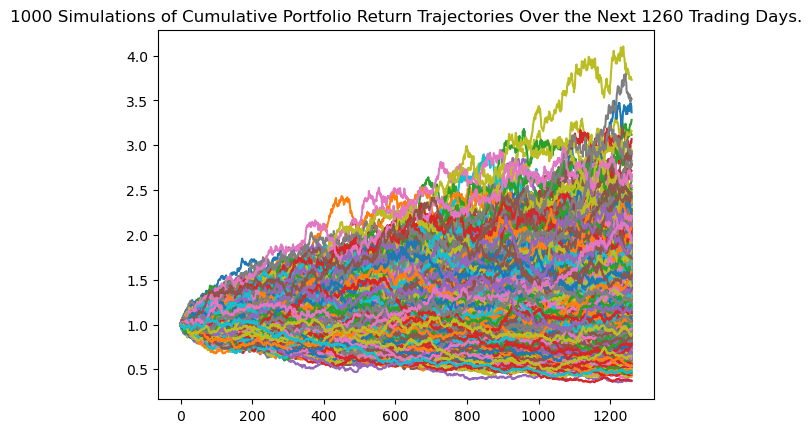

In [15]:
# Visualize the Monte Carlo simulation by creating an
# overlay line plot
even_weight_line_plot = MC_even_weight.plot_simulation()

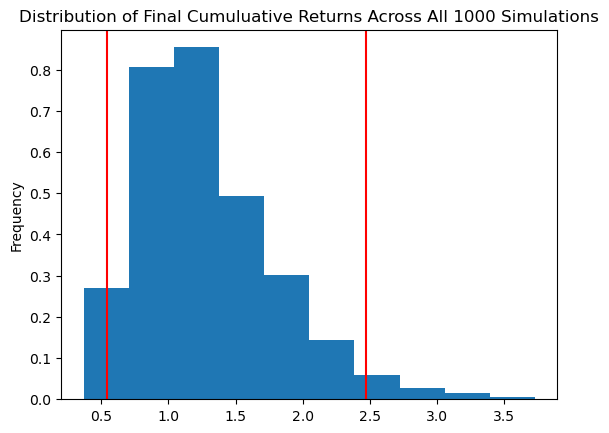

In [16]:
# Visualize the Monte Carlo simulation by creating a histogram
even_weight_distribution_plot = MC_even_weight.plot_distribution()

In [17]:
# Generate the summary statistics for the Monte Carlo simulation
# Save the summary statistics information in a variable called even_weights_table 
even_weight_table = MC_even_weight.summarize_cumulative_return()

# Print the table of summary statistics
even_weight_table

C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           1000.000000
mean               1.282915
std                0.514444
min                0.370550
25%                0.918389
50%                1.166974
75%                1.571103
max                3.730939
95% CI Lower       0.545543
95% CI Upper       2.471845
Name: 1260, dtype: float64

## Step 8: Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [19]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the even_weight_table)
# calculate  the range of the possible outcomes for a $15,000 investment 
even_ci_lower = even_weight_table[8] * 15000
even_ci_upper = even_weight_table[9] * 15000

# Print results of your calculations
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with an even weight portfolio over the next 5 years will end within in the range of"
      f" ${even_ci_lower:.2f} and ${even_ci_upper:.2f}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with an even weight portfolio over the next 5 years will end within in the range of $8183.14 and $37077.67.


## Step 9: Create a second instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.20,.60,.20]` to represent a portfolio with a majority of AT&T stock.

In [22]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns 
# Use a weight of .60 for AT&T and .20 for the remaining 2 stocks
MC_att = MCSimulation(
    portfolio_data=prices_df,
    weights=[.2,.6,.2],
    num_simulation=1000,
    num_trading_days=252*5
)

# Printing the first five rows of the simulation input data
display(MC_att.portfolio_data.head())
display(MC_att.portfolio_data.tail())

NKE                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2020-12-11 05:00:00+00:00  137.41  138.14  136.2300       48095  137.39   
2020-12-14 05:00:00+00:00  136.28  139.00  136.2000       71983  138.92   
2020-12-15 05:00:00+00:00  139.39  139.44  137.2491       63392  137.43   
2020-12-16 05:00:00+00:00  138.34  140.49  137.4600       66526  139.07   
2020-12-17 05:00:00+00:00  140.50  140.74  138.7500       71041  139.92   

                                                                  T         \
                             volume        vwap daily_return  close   high   
timestamp                                                                    
2020-12-11 05:00:00+00:00   4791625  137.205640          NaN  31.01  31.09   
2020-12-14 05:00:00+00:00   9094010  137.110215    -0.008224  30.55  31.27   
2020-12-15 05:00:00+00:00   8654601  138.637956     0.022821  30.58  30.70   
2020-12-16 05:00:00+00:00   7760287  138.360640    -0.007533  30.29  30.59   
2020-12-17 05:00:00+00:00  10082003  140.203319     0.015614  29.62  30.12   

                           ...                            XOM                 \
                           ...       vwap daily_return  close    high    low   
timestamp                  ...                                                 
2020-12-11 05:00:00+00:00  ...  30.871040          NaN  43.80  43.925  43.21   
2020-12-14 05:00:00+00:00  ...  30.732606    -0.014834  42.22  44.460  42.18   
2020-12-15 05:00:00+00:00  ...  30.545353     0.000982  43.04  43.220  42.06   
2020-12-16 05:00:00+00:00  ...  30.345518    -0.009483  43.70  44.110  42.96   
2020-12-17 05:00:00+00:00  ...  29.699122    -0.022120  43.48  44.040  43.40   

                                                                                
                          trade_count   open    volume       vwap daily_return  
timestamp                                                                       
2020-12-11 05:00:00+00:00      138495  43.70  28221793  43.645405          NaN  
2020-12-14 05:00:00+00:00      156228  44.34  33923655  42.793300    -0.036073  
2020-12-15 05:00:00+00:00      144429  42.44  30474285  42.802554     0.019422  
2020-12-16 05:00:00+00:00      168207  43.75  38379695  43.675632     0.015335  
2020-12-17 05:00:00+00:00      123427  44.00  23380602  43.636206    -0.005034  

[5 rows x 24 columns]

NKE                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2023-12-05 05:00:00+00:00  115.41  116.04  114.6000       88366  114.66   
2023-12-06 05:00:00+00:00  116.11  117.14  115.5721       81078  116.00   
2023-12-07 05:00:00+00:00  114.81  116.00  114.1200       84772  114.12   
2023-12-08 05:00:00+00:00  115.91  116.29  114.4700       72693  114.50   
2023-12-11 05:00:00+00:00  118.61  119.42  117.4300       99702  117.79   

                                                                 T         \
                            volume        vwap daily_return  close   high   
timestamp                                                                   
2023-12-05 05:00:00+00:00  6959966  115.515397     0.002258  17.22  17.34   
2023-12-06 05:00:00+00:00  6316960  116.359022     0.006065  16.94  17.28   
2023-12-07 05:00:00+00:00  7294460  115.058252    -0.011196  17.09  17.13   
2023-12-08 05:00:00+00:00  6121425  115.813658     0.009581  16.92  17.11   
2023-12-11 05:00:00+00:00  7964932  118.683231     0.023294  16.62  16.94   

                           ...                             XOM            \
                           ...       vwap daily_return   close      high   
timestamp                  ...                                             
2023-12-05 05:00:00+00:00  ...  17.179193     0.033613  100.44  102.3400   
2023-12-06 05:00:00+00:00  ...  17.041046    -0.016260   99.11  100.7200   
2023-12-07 05:00:00+00:00  ...  17.056692     0.008855   98.42  100.8350   
2023-12-08 05:00:00+00:00  ...  16.927095    -0.009947   99.55   99.7867   
2023-12-11 05:00:00+00:00  ...  16.659151    -0.017730   99.62   99.8600   

                                                                             \
                              low trade_count    open    volume        vwap   
timestamp                                                                     
2023-12-05 05:00:00+00:00  100.29      197925  102.27  22250251  101.021919   
2023-12-06 05:00:00+00:00   98.34      275143  100.00  31154792   99.278750   
2023-12-07 05:00:00+00:00   98.09      259510   99.86  29990727   98.969257   
2023-12-08 05:00:00+00:00   98.75      196370   99.02  22070842   99.355056   
2023-12-11 05:00:00+00:00   98.58      188353   99.80  22217270   99.353278   

                                        
                          daily_return  
timestamp                               
2023-12-05 05:00:00+00:00    -0.019428  
2023-12-06 05:00:00+00:00    -0.013242  
2023-12-07 05:00:00+00:00    -0.006962  
2023-12-08 05:00:00+00:00     0.011481  
2023-12-11 05:00:00+00:00     0.000703  

[5 rows x 24 columns]

## Step 10: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.


In [24]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% AT&T (ticker: T) stock
MC_att.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 110.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 120.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 130.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 140.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 150.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 160.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 170.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 180.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 190.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 200.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 210.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 220.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 230.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 240.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 250.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 260.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 270.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 280.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 290.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 300.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 310.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 320.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 330.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 340.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 350.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 360.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 370.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 380.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 390.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 400.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 410.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 420.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 430.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 440.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 450.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 460.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 470.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 480.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 490.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 500.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 510.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 520.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 530.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 540.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 550.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 560.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 570.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 580.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 590.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 600.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 610.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 620.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 630.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 640.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 650.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 660.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 670.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 680.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 690.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 700.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 710.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 720.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 730.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 740.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 750.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 760.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 770.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 780.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 790.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 800.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 810.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 820.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 830.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 840.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 850.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 860.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 870.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 880.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 890.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 900.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 910.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 920.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 930.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 940.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 950.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 960.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 970.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 980.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 990.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997774,0.980806,0.999333,1.014879,1.003426,1.005215,1.008414,1.001050,0.996707,0.988289,...,1.010505,0.989949,1.007309,1.004965,1.011941,0.992960,0.993464,1.010065,1.001749,0.995927
2,0.994386,0.988077,1.006285,1.030621,1.008064,1.013404,1.026901,0.999242,0.982442,0.975764,...,1.005364,0.996225,1.016385,0.992867,1.000150,1.001834,1.004307,1.008776,0.990432,0.988122
3,0.988144,0.998232,1.017427,1.029852,1.048050,1.043221,1.018087,0.999153,0.976985,0.970229,...,0.990143,1.013680,1.018330,0.993966,0.991590,0.978457,1.010602,1.003406,0.991407,0.969216
4,0.968215,1.002770,1.011442,1.034748,1.039407,1.019759,1.024732,1.007483,0.999693,0.980192,...,0.991496,1.016660,0.995538,0.985879,0.999508,0.973653,1.023090,1.003331,0.977088,0.974174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.762852,1.381853,0.547791,0.622218,1.489921,0.606380,0.554179,0.700231,0.910013,0.906408,...,0.465408,0.720241,0.593434,0.585220,0.970370,0.425625,0.770063,0.961288,0.494465,0.767521
1257,0.775249,1.392494,0.539788,0.626520,1.503215,0.609132,0.549102,0.689560,0.904085,0.892854,...,0.461016,0.712959,0.597624,0.585430,0.962698,0.421506,0.772209,0.976853,0.484578,0.769326
1258,0.772270,1.393005,0.544477,0.621693,1.490450,0.611301,0.546499,0.680756,0.902615,0.885419,...,0.460399,0.701962,0.590472,0.584261,0.951979,0.425221,0.766570,0.996013,0.487274,0.776058
1259,0.771632,1.384556,0.537616,0.621139,1.510355,0.614512,0.549944,0.674849,0.890456,0.882888,...,0.460425,0.705322,0.583817,0.587674,0.939914,0.426205,0.743631,1.014068,0.489485,0.778638


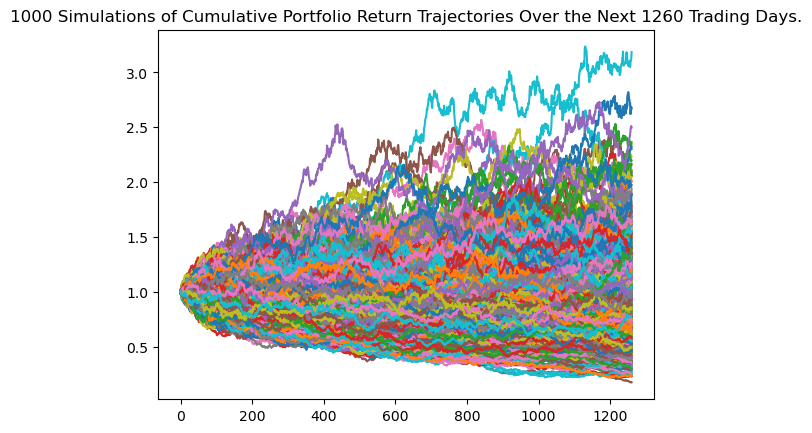

In [26]:
# Visualize the Monte Carlo simulation for a majority weight in AT&T
# by creating an overlay line plot
att_line_plot = MC_att.plot_simulation()

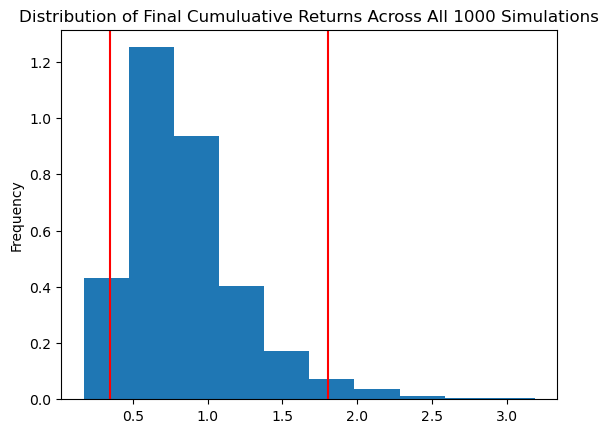

In [27]:
# Visualize the Monte Carlo simulation for a majority weight in AT&T
# by creating a histogram
att_dist_plot = MC_att.plot_distribution()

In [28]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in AT&T
# Save the summary statistics information in a variable called att_table 
att_table = MC_att.summarize_cumulative_return()

# Print summary statistics
att_table

C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           1000.000000
mean               0.840775
std                0.380228
min                0.173500
25%                0.569209
50%                0.767856
75%                1.014169
max                3.186025
95% CI Lower       0.347199
95% CI Upper       1.804175
Name: 1260, dtype: float64

In [29]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the att_table)
# calculate  the range of the possible outcomes for a $15,000 investment 
att_ci_lower = att_table[8] * 15000
att_ci_upper = att_table[9] * 15000

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in AT&T over the next 5 years will end within in the range of"
      f" ${att_ci_lower:.2f} and ${att_ci_upper:.2f}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in AT&T over the next 5 years will end within in the range of $5207.98 and $27062.62.


## Step 11: Create a third instance of MCSimulation with the same parameters, but set the `weights` variable to `[.60,.20,.20]` to represent a portfolio with a majority of Nike stock.

In [31]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
# Use a weight of .60 for Nike and .20 for the remaining 2 stocks
MC_nike = MCSimulation(
    portfolio_data=prices_df,
    weights=[.6,.2,.2],
    num_simulation=1000,
    num_trading_days=252*5
)

# Printing the first five rows of the simulation input data
display(MC_nike.portfolio_data.head())
display(MC_nike.portfolio_data.tail())

NKE                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2020-12-11 05:00:00+00:00  137.41  138.14  136.2300       48095  137.39   
2020-12-14 05:00:00+00:00  136.28  139.00  136.2000       71983  138.92   
2020-12-15 05:00:00+00:00  139.39  139.44  137.2491       63392  137.43   
2020-12-16 05:00:00+00:00  138.34  140.49  137.4600       66526  139.07   
2020-12-17 05:00:00+00:00  140.50  140.74  138.7500       71041  139.92   

                                                                  T         \
                             volume        vwap daily_return  close   high   
timestamp                                                                    
2020-12-11 05:00:00+00:00   4791625  137.205640          NaN  31.01  31.09   
2020-12-14 05:00:00+00:00   9094010  137.110215    -0.008224  30.55  31.27   
2020-12-15 05:00:00+00:00   8654601  138.637956     0.022821  30.58  30.70   
2020-12-16 05:00:00+00:00   7760287  138.360640    -0.007533  30.29  30.59   
2020-12-17 05:00:00+00:00  10082003  140.203319     0.015614  29.62  30.12   

                           ...                            XOM                 \
                           ...       vwap daily_return  close    high    low   
timestamp                  ...                                                 
2020-12-11 05:00:00+00:00  ...  30.871040          NaN  43.80  43.925  43.21   
2020-12-14 05:00:00+00:00  ...  30.732606    -0.014834  42.22  44.460  42.18   
2020-12-15 05:00:00+00:00  ...  30.545353     0.000982  43.04  43.220  42.06   
2020-12-16 05:00:00+00:00  ...  30.345518    -0.009483  43.70  44.110  42.96   
2020-12-17 05:00:00+00:00  ...  29.699122    -0.022120  43.48  44.040  43.40   

                                                                                
                          trade_count   open    volume       vwap daily_return  
timestamp                                                                       
2020-12-11 05:00:00+00:00      138495  43.70  28221793  43.645405          NaN  
2020-12-14 05:00:00+00:00      156228  44.34  33923655  42.793300    -0.036073  
2020-12-15 05:00:00+00:00      144429  42.44  30474285  42.802554     0.019422  
2020-12-16 05:00:00+00:00      168207  43.75  38379695  43.675632     0.015335  
2020-12-17 05:00:00+00:00      123427  44.00  23380602  43.636206    -0.005034  

[5 rows x 24 columns]

NKE                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2023-12-05 05:00:00+00:00  115.41  116.04  114.6000       88366  114.66   
2023-12-06 05:00:00+00:00  116.11  117.14  115.5721       81078  116.00   
2023-12-07 05:00:00+00:00  114.81  116.00  114.1200       84772  114.12   
2023-12-08 05:00:00+00:00  115.91  116.29  114.4700       72693  114.50   
2023-12-11 05:00:00+00:00  118.61  119.42  117.4300       99702  117.79   

                                                                 T         \
                            volume        vwap daily_return  close   high   
timestamp                                                                   
2023-12-05 05:00:00+00:00  6959966  115.515397     0.002258  17.22  17.34   
2023-12-06 05:00:00+00:00  6316960  116.359022     0.006065  16.94  17.28   
2023-12-07 05:00:00+00:00  7294460  115.058252    -0.011196  17.09  17.13   
2023-12-08 05:00:00+00:00  6121425  115.813658     0.009581  16.92  17.11   
2023-12-11 05:00:00+00:00  7964932  118.683231     0.023294  16.62  16.94   

                           ...                             XOM            \
                           ...       vwap daily_return   close      high   
timestamp                  ...                                             
2023-12-05 05:00:00+00:00  ...  17.179193     0.033613  100.44  102.3400   
2023-12-06 05:00:00+00:00  ...  17.041046    -0.016260   99.11  100.7200   
2023-12-07 05:00:00+00:00  ...  17.056692     0.008855   98.42  100.8350   
2023-12-08 05:00:00+00:00  ...  16.927095    -0.009947   99.55   99.7867   
2023-12-11 05:00:00+00:00  ...  16.659151    -0.017730   99.62   99.8600   

                                                                             \
                              low trade_count    open    volume        vwap   
timestamp                                                                     
2023-12-05 05:00:00+00:00  100.29      197925  102.27  22250251  101.021919   
2023-12-06 05:00:00+00:00   98.34      275143  100.00  31154792   99.278750   
2023-12-07 05:00:00+00:00   98.09      259510   99.86  29990727   98.969257   
2023-12-08 05:00:00+00:00   98.75      196370   99.02  22070842   99.355056   
2023-12-11 05:00:00+00:00   98.58      188353   99.80  22217270   99.353278   

                                        
                          daily_return  
timestamp                               
2023-12-05 05:00:00+00:00    -0.019428  
2023-12-06 05:00:00+00:00    -0.013242  
2023-12-07 05:00:00+00:00    -0.006962  
2023-12-08 05:00:00+00:00     0.011481  
2023-12-11 05:00:00+00:00     0.000703  

[5 rows x 24 columns]

## Step 12: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

*Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [32]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% Nike (ticker: NKE) stock
MC_nike.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 110.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 120.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 130.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 140.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 150.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 160.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 170.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 180.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 190.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 200.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 210.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 220.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 230.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 240.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 250.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 260.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 270.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 280.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 290.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 300.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 310.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 320.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 330.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 340.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 350.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 360.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 370.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 380.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 390.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 400.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 410.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 420.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 430.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 440.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 450.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 460.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 470.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 480.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 490.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 500.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 510.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 520.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 530.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 540.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 550.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 560.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 570.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 580.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 590.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 600.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 610.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 620.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 630.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 640.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 650.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 660.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 670.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 680.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 690.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 700.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 710.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 720.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 730.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 740.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 750.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 760.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 770.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 780.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 790.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 800.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 810.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 820.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 830.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 840.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 850.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 860.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 870.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 880.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 890.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 900.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 910.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 920.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 930.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 940.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 950.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 960.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 970.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 980.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 990.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985934,0.987136,1.024518,1.002311,0.995250,0.986690,0.992963,0.994964,1.000163,1.002608,...,0.994231,1.012395,1.001328,0.996447,0.990479,1.008424,1.002075,0.999346,0.999953,1.027181
2,0.989534,0.968704,1.043191,1.001603,1.015652,0.965564,0.996731,1.017738,1.000916,1.036364,...,0.985835,1.012442,0.997811,0.998265,0.996636,0.994580,1.003460,1.017757,0.985406,1.015681
3,0.970361,0.950049,1.023017,1.003298,0.995677,0.962171,0.994748,1.010758,0.988128,1.052222,...,0.987600,1.014455,1.014051,0.992885,1.010981,1.004934,0.982736,1.012037,0.981684,1.025077
4,0.979862,0.965001,1.013174,1.016789,1.013870,0.962527,0.985370,1.022556,1.005735,1.041039,...,1.000993,1.002266,1.020041,0.985169,1.026741,1.014635,1.007505,1.044794,0.977610,1.030533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.226533,0.527882,1.176120,1.512405,2.101665,0.408990,0.478234,1.323193,0.923515,1.024118,...,0.914081,0.371355,0.327063,1.477627,0.573575,1.197908,1.183863,1.136756,1.593594,0.701633
1257,2.268548,0.520442,1.185761,1.559287,2.082265,0.417106,0.466733,1.327453,0.917839,1.006308,...,0.896758,0.364338,0.330697,1.459798,0.567963,1.189531,1.173181,1.116992,1.549072,0.717073
1258,2.259659,0.518074,1.183876,1.577682,2.081457,0.405632,0.467169,1.316917,0.917361,1.011951,...,0.906509,0.365308,0.329642,1.481994,0.574405,1.170418,1.156371,1.098776,1.553254,0.719433
1259,2.266789,0.502649,1.188588,1.532889,2.123661,0.411099,0.471705,1.354564,0.928053,0.997656,...,0.911968,0.366917,0.329563,1.487586,0.562723,1.191752,1.159218,1.073752,1.548182,0.731074


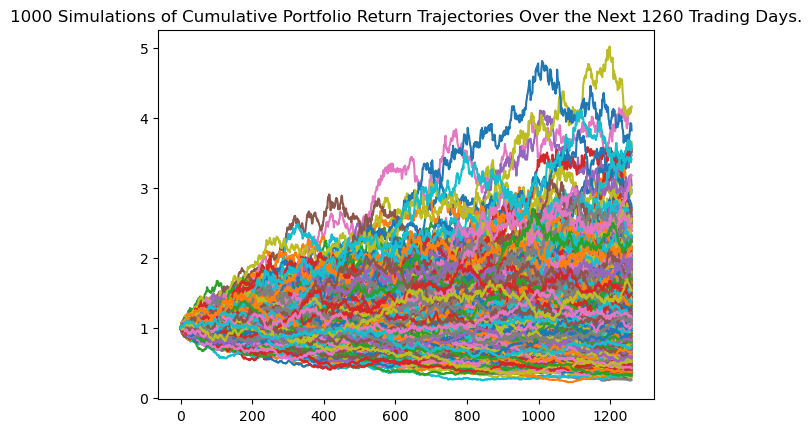

In [33]:
# Visualize the Monte Carlo simulation for a majority weight in Nike
# by creating an overlay line plot
nike_line_plot = MC_nike.plot_simulation()

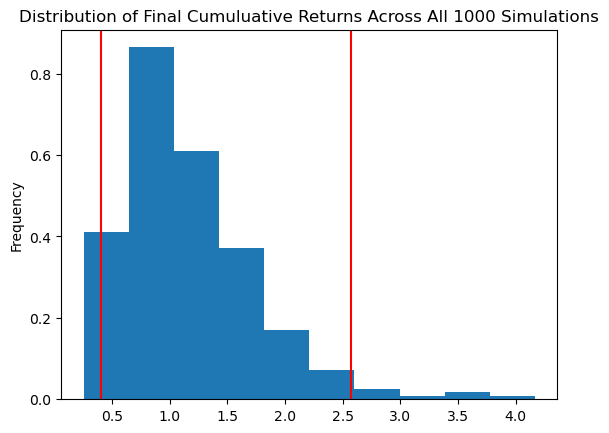

In [34]:
# Visualize the Monte Carlo simulation for a majority weight in Nike
# by creating a histogram
nike_dist_plot = MC_nike.plot_distribution()

In [35]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in Nike
# Save the summary statistics information in a variable called nike_table 
nike_table = MC_nike.summarize_cumulative_return()

# Print summary statistics
nike_table

C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           1000.000000
mean               1.160874
std                0.577340
min                0.255698
25%                0.755559
50%                1.038246
75%                1.452483
max                4.165264
95% CI Lower       0.406045
95% CI Upper       2.573716
Name: 1260, dtype: float64

In [36]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the nike_table),
# calculate  the range of the possible outcomes for a $15,000 investment 
nike_ci_lower = nike_table[8] * 15000
nike_ci_upper = nike_table[9] * 15000

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Nike over the next 5 years will end within in the range of"
      f" ${nike_ci_lower:.2f} and ${nike_ci_upper:.2f}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Nike over the next 5 years will end within in the range of $6090.68 and $38605.75.


## Step 13: Create a fourth instance of MCSimulation with the same parameters, but set the `weights` variable to `[.20,.20,.60]` to represent a portfolio with a majority of Exxon stock.

In [37]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
# Use a weight of .60 for XOM and .20 for the remaining 2 stocks
MC_exxon = MCSimulation(
    portfolio_data=prices_df,
    weights=[.2,.2,.6],
    num_simulation=1000,
    num_trading_days=252*5
)

# Printing the first five rows of the simulation input data
display(MC_exxon.portfolio_data.head())
display(MC_exxon.portfolio_data.tail())

NKE                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2020-12-11 05:00:00+00:00  137.41  138.14  136.2300       48095  137.39   
2020-12-14 05:00:00+00:00  136.28  139.00  136.2000       71983  138.92   
2020-12-15 05:00:00+00:00  139.39  139.44  137.2491       63392  137.43   
2020-12-16 05:00:00+00:00  138.34  140.49  137.4600       66526  139.07   
2020-12-17 05:00:00+00:00  140.50  140.74  138.7500       71041  139.92   

                                                                  T         \
                             volume        vwap daily_return  close   high   
timestamp                                                                    
2020-12-11 05:00:00+00:00   4791625  137.205640          NaN  31.01  31.09   
2020-12-14 05:00:00+00:00   9094010  137.110215    -0.008224  30.55  31.27   
2020-12-15 05:00:00+00:00   8654601  138.637956     0.022821  30.58  30.70   
2020-12-16 05:00:00+00:00   7760287  138.360640    -0.007533  30.29  30.59   
2020-12-17 05:00:00+00:00  10082003  140.203319     0.015614  29.62  30.12   

                           ...                            XOM                 \
                           ...       vwap daily_return  close    high    low   
timestamp                  ...                                                 
2020-12-11 05:00:00+00:00  ...  30.871040          NaN  43.80  43.925  43.21   
2020-12-14 05:00:00+00:00  ...  30.732606    -0.014834  42.22  44.460  42.18   
2020-12-15 05:00:00+00:00  ...  30.545353     0.000982  43.04  43.220  42.06   
2020-12-16 05:00:00+00:00  ...  30.345518    -0.009483  43.70  44.110  42.96   
2020-12-17 05:00:00+00:00  ...  29.699122    -0.022120  43.48  44.040  43.40   

                                                                                
                          trade_count   open    volume       vwap daily_return  
timestamp                                                                       
2020-12-11 05:00:00+00:00      138495  43.70  28221793  43.645405          NaN  
2020-12-14 05:00:00+00:00      156228  44.34  33923655  42.793300    -0.036073  
2020-12-15 05:00:00+00:00      144429  42.44  30474285  42.802554     0.019422  
2020-12-16 05:00:00+00:00      168207  43.75  38379695  43.675632     0.015335  
2020-12-17 05:00:00+00:00      123427  44.00  23380602  43.636206    -0.005034  

[5 rows x 24 columns]

NKE                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2023-12-05 05:00:00+00:00  115.41  116.04  114.6000       88366  114.66   
2023-12-06 05:00:00+00:00  116.11  117.14  115.5721       81078  116.00   
2023-12-07 05:00:00+00:00  114.81  116.00  114.1200       84772  114.12   
2023-12-08 05:00:00+00:00  115.91  116.29  114.4700       72693  114.50   
2023-12-11 05:00:00+00:00  118.61  119.42  117.4300       99702  117.79   

                                                                 T         \
                            volume        vwap daily_return  close   high   
timestamp                                                                   
2023-12-05 05:00:00+00:00  6959966  115.515397     0.002258  17.22  17.34   
2023-12-06 05:00:00+00:00  6316960  116.359022     0.006065  16.94  17.28   
2023-12-07 05:00:00+00:00  7294460  115.058252    -0.011196  17.09  17.13   
2023-12-08 05:00:00+00:00  6121425  115.813658     0.009581  16.92  17.11   
2023-12-11 05:00:00+00:00  7964932  118.683231     0.023294  16.62  16.94   

                           ...                             XOM            \
                           ...       vwap daily_return   close      high   
timestamp                  ...                                             
2023-12-05 05:00:00+00:00  ...  17.179193     0.033613  100.44  102.3400   
2023-12-06 05:00:00+00:00  ...  17.041046    -0.016260   99.11  100.7200   
2023-12-07 05:00:00+00:00  ...  17.056692     0.008855   98.42  100.8350   
2023-12-08 05:00:00+00:00  ...  16.927095    -0.009947   99.55   99.7867   
2023-12-11 05:00:00+00:00  ...  16.659151    -0.017730   99.62   99.8600   

                                                                             \
                              low trade_count    open    volume        vwap   
timestamp                                                                     
2023-12-05 05:00:00+00:00  100.29      197925  102.27  22250251  101.021919   
2023-12-06 05:00:00+00:00   98.34      275143  100.00  31154792   99.278750   
2023-12-07 05:00:00+00:00   98.09      259510   99.86  29990727   98.969257   
2023-12-08 05:00:00+00:00   98.75      196370   99.02  22070842   99.355056   
2023-12-11 05:00:00+00:00   98.58      188353   99.80  22217270   99.353278   

                                        
                          daily_return  
timestamp                               
2023-12-05 05:00:00+00:00    -0.019428  
2023-12-06 05:00:00+00:00    -0.013242  
2023-12-07 05:00:00+00:00    -0.006962  
2023-12-08 05:00:00+00:00     0.011481  
2023-12-11 05:00:00+00:00     0.000703  

[5 rows x 24 columns]

## Step 14: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [38]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% Exxon (ticker: XOM) stock
MC_exxon.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 110.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 120.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 130.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 140.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 150.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 160.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 170.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 180.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 190.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 200.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 210.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 220.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 230.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 240.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 250.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 260.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 270.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 280.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 290.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 300.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 310.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 320.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 330.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 340.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 350.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 360.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 370.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 380.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 390.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 400.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 410.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 420.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 430.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 440.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 450.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 460.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 470.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 480.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 490.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 500.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 510.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 520.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 530.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 540.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 550.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 560.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 570.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 580.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 590.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 600.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 610.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 620.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 630.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 640.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 650.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 660.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 670.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 680.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 690.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 700.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 710.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 720.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 730.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 740.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 750.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 760.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 770.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 780.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 790.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 800.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 810.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 820.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 830.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 840.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 850.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 860.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 870.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 880.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 890.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 900.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 910.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 920.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 930.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 940.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 950.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 960.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 970.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 980.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

Running Monte Carlo simulation number 990.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Des

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995292,1.014636,0.993804,0.969275,1.002295,1.016430,0.987865,1.025872,1.006869,1.000070,...,1.014406,0.983062,1.011384,0.986540,0.983285,1.018205,1.001798,0.982256,0.994321,0.999637
2,1.000544,1.010068,1.013355,0.973011,1.015257,1.001580,0.950228,1.033073,1.018346,1.005845,...,1.004771,0.984492,1.029800,0.984914,0.987060,1.029715,1.011830,0.963551,0.982463,1.006939
3,0.989460,1.028535,1.008745,0.995391,1.021642,0.994042,0.944468,1.045412,1.009954,0.981443,...,1.014791,0.978023,1.016198,0.980786,0.992890,1.039173,0.997012,0.963982,0.965900,1.001433
4,1.009616,1.034530,1.018167,1.017613,0.988669,0.988113,0.941086,1.023402,1.015231,0.966721,...,1.001604,0.995645,1.012476,0.977880,0.998111,1.039092,0.978968,0.978857,0.968095,1.022794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.172717,2.302213,3.043021,1.413183,2.883329,2.811293,2.232150,1.666438,1.259722,3.016770,...,2.180314,2.014072,1.743545,2.549493,2.492813,1.986535,1.643596,2.597813,0.898051,2.101672
1257,1.192854,2.330684,3.031853,1.439437,2.954938,2.823670,2.171225,1.669482,1.296065,3.009902,...,2.175405,2.014850,1.756463,2.531097,2.545342,2.020177,1.625266,2.608114,0.905526,2.131816
1258,1.208163,2.388237,2.958613,1.460258,2.894434,2.847562,2.148235,1.707454,1.286740,2.966884,...,2.119211,1.997125,1.754979,2.572507,2.543410,1.964430,1.607108,2.622819,0.884270,2.152506
1259,1.193728,2.425980,2.923851,1.470108,2.893673,2.815854,2.104018,1.678286,1.288985,2.943723,...,2.117353,2.027158,1.771935,2.607816,2.531297,2.013059,1.619780,2.587937,0.888327,2.140214


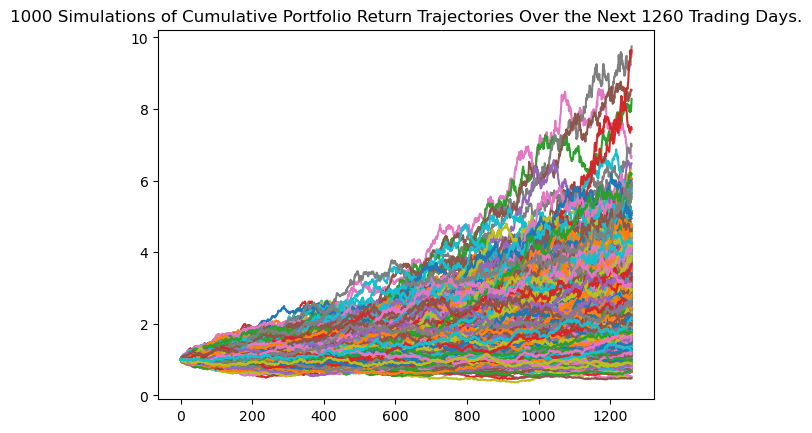

In [39]:
# Visualize the Monte Carlo simulation for a majority weight in Exxon
# by creating an overlay line plot
exxon_line_plot = MC_exxon.plot_simulation()

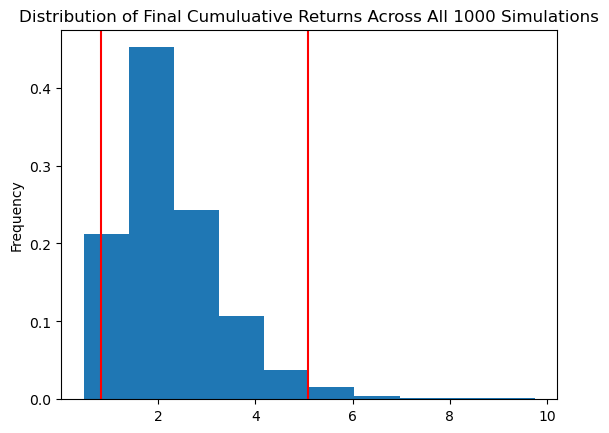

In [40]:
# Visualize the Monte Carlo simulation for a majority weight in Exxon
# by creating a histogram
exxon_dist_plot = MC_exxon.plot_distribution()

In [41]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in Exxon
# Save the summary statistics information in a variable called nexxontable 
exxon_table = MC_exxon.summarize_cumulative_return()

# Print summary statistics
exxon_table

C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Unsolved\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           1000.000000
mean               2.286066
std                1.138577
min                0.476297
25%                1.513403
50%                2.046739
75%                2.789788
max                9.748773
95% CI Lower       0.827782
95% CI Upper       5.092005
Name: 1260, dtype: float64

In [42]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the exxon_table),
# calculate  the range of the possible outcomes for a $15,000 investment 
exxon_ci_lower = exxon_table[8] * 15000
exxon_ci_upper = exxon_table[9] * 15000

# Print results
# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Exxon over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower:.2f} and ${exxon_ci_upper:.2f}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Exxon over the next 5 years will end within in the range of $12416.72 and $76380.07.


## Step 15: Review all four simulated portfolios, and determine which set of investments gives you the best chance of a profit. In your notebook, write which portfolio you choose, and why.

In [43]:
# Even weighted stocks
print("Even weighted stocks")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with an even weight over the next 5 years will end within in the range of"
      f" ${even_ci_lower:.2f} and ${even_ci_upper:.2f}.")
print("------------")

# 60% for AT&T
print("60% for AT&T")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in AT&T over the next 5 years will end within in the range of"
      f" ${att_ci_lower:.2f} and ${att_ci_upper:.2f}.")
print("------------")

# 60% for Nike
print("60% for Nike")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Nike over the next 5 years will end within in the range of"
      f" ${nike_ci_lower:.2f} and ${nike_ci_upper:.2f}.")
print("------------")

# 60% for Exxon
print("60% for Exxon")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Exxon over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower:.2f} and ${exxon_ci_upper:.2f}.")
print("------------")

Even weighted stocks
There is a 95% chance that an initial investment of $15,000 in the portfolio with an even weight over the next 5 years will end within in the range of $8183.14 and $37077.67.
------------
60% for AT&T
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in AT&T over the next 5 years will end within in the range of $5207.98 and $27062.62.
------------
60% for Nike
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Nike over the next 5 years will end within in the range of $6090.68 and $38605.75.
------------
60% for Exxon
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Exxon over the next 5 years will end within in the range of $12416.72 and $76380.07.
------------


**Question:** Based on the above information, which set of investments gives you the best chance of a profit?

**Answer:** Based on the analysis of all projected returns, the option in which Exxon is weighted at 60% is the most profitable option. It yields the highest lower and upper bound returns in comparison to the other weighted scenarios.